# Projet 6: Analysez les ventes d'une librairie 

## 1. Imporatation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

## 2. Importation des fichiers csv

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

## 3. Exploration et nettoyage des DataFrames
### 3.1 Exploration et nettoyage du DataFrame customers

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers.shape

(8623, 3)

In [5]:
# J'affiche le nombre de valeurs manquantes par serie
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [6]:
# Je vérifie s'il existe des doublons dans la serie 'client_id' autrement dit je vérifie l'unicité de la clé primaire
customers['client_id'].duplicated().sum()

0

In [7]:
customers['sex'].unique()

array(['f', 'm'], dtype=object)

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
# Je vérifie s'il n'y à pas de valeurs aberrantes dans la serie 'birth'
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


#### Le DataFrame costumers comporte 3 series et 8623 individus, il n'y a pas de valeurs NAN ni et de doublons. la serie 'client_id' sera utiliser comme clé de jointure. Il n'y a pas de valeurs aberrantes dans la série 'birth'.

### 3.2 Exploration et nettoyage du DataFrame products

In [10]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
products.shape

(3287, 3)

In [12]:
# J'affiche le nombre de valeurs manquantes par serie
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [13]:
# Je vérifie s'il existe des doublons dans la serie 'id_prod' autrement dit je vérifie l'unicité de la clé primaire
products['id_prod'].duplicated().sum()

0

In [14]:
# J'affiche le nombre des differentes catégories
products['categ'].nunique()

3

In [15]:
# J'affiche les differentes catégories 
products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [17]:
# J'affiche à present le prix minimum, moyen et maximum.
print('Le prix le plus bas est de', round(products['price'].min(),2), '€.')
print('Le prix moyen est de', round(products['price'].mean(),2), '€.')
print('Le prix le plus élevé est de', round(products['price'].max(),2), '€.')

Le prix le plus bas est de -1.0 €.
Le prix moyen est de 21.86 €.
Le prix le plus élevé est de 300.0 €.


In [18]:
# J'affiche les prix inferieur à 0.01
products[products['price'] < 0.01 ]

,id_prod,price,categ
731,T_0,-1.0,0


#### Il y'a une une seule valeur négative, à creuser par la suite. 

In [19]:
# Je calcule les 3 quartiles : Q1, Q2 et Q3
Q1 = round(products['price'].quantile(0.25),2)
Q2 = round(products['price'].quantile(0.50),2) 
Q3 = round(products['price'].quantile(0.75),2)

print('Le premier quartile est égale à', Q1)
print('Le deuxième quartile est égale à', Q2)
print('Le troisième quartile est égale à', Q3)

Le premier quartile est égale à 6.99
Le deuxième quartile est égale à 13.06
Le troisième quartile est égale à 22.99


In [20]:
products['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

#### 1/4 des prix sont infèrieurs à 6.99 € ;

#### 2/4 des prix sont infèrieures à 13.06 € et 2/4 sont supérieurs ( il s'agit ici de la médiane);

#### 3/4 des prix sont infèrieures à 22.99 €.

In [21]:
# Je calcule l'écart interquartile
IQ = round(Q3 - Q1,2)
print('L\'écart interquartile est égale à', IQ)

L'écart interquartile est égale à 16.0


In [22]:
# Calcule des outliers
outliers_inf =  round(Q1 - 1.5* IQ,2) 
outliers_sup =  round(Q3 + 1.5* IQ,2)
print('La limite inférieure des outliers est de', outliers_inf)
print('La limite supérieure des outliers est de', outliers_sup)

La limite inférieure des outliers est de -17.01
La limite supérieure des outliers est de 46.99


In [23]:
# J'affiche la liste des valeures aberrantes (outliers)
valeures_aberrantes = products.loc[products['price'] > 46.99, [ 'id_prod','price', 'categ']]
valeures_aberrantes.count()

id_prod    300
price      300
categ      300
dtype: int64

In [24]:
# J'affiche les 10 plus grandes valeurs aberrantes 
valeures_aberrantes.sort_values(by=['price'], ascending=False).head()

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2


#### Les valeurs vraisemblalment aberrantes les plus élevées sont toutes de catégorie 2.

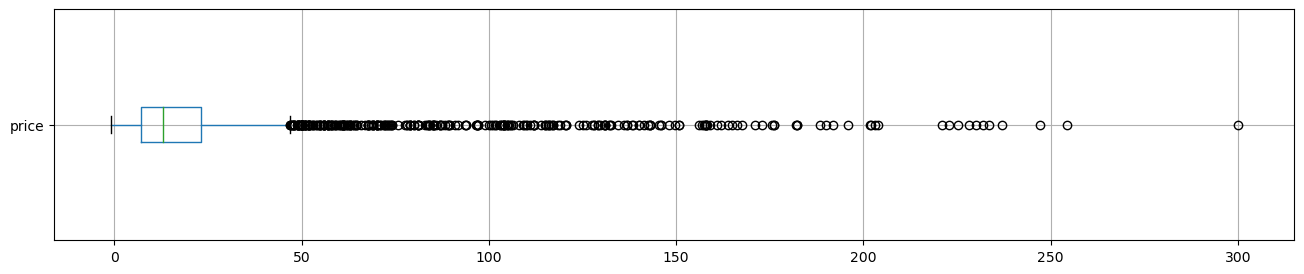

In [25]:
# J'affiche les valeurs aberrantes dans une boîte à moustache
figure = plt.figure(figsize = (16,3))
products.boxplot(column='price', vert=False)
plt.show()

#### Toutes les valeurs aberrantes sont représentées par les ronds noirs, elles ne sont pas incluent dans la boîte à moustache. Elles représentent toutes les valeurs supèrieures à 46.99 euros, qui est la limite supérieure des outliers. On remarque ici que la médiane est plus proche au Q1, donc elle est asymètrique étalée vers les grandes valeurs. 

#### Le DataFrame products comporte 3 series et 3287 individus, il n'y a pas de valeurs NAN ni et de doublons. la serie 'id_prod' sera utiliser comme clé de jointure. Il y à des valeurs vraisembleblement aberrantes dans la série 'price', elle concernent la catégorie 2. 

### 3.3 Exploration et nettoyage du DataFrame transactions

In [26]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [27]:
transactions.shape

(679532, 4)

In [28]:
# J'affiche le nombre de valeurs manquantes par serie
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [29]:
transactions.shape

(679532, 4)

In [30]:
# # Je vérifie s'il existe des doublons dans le df en prenant les deux séries 'id_prod' et 'client_id
# exemple 1
transactions[(transactions['client_id'] == 'c_1052') & (transactions['id_prod'] == '0_0')]

,id_prod,date,session_id,client_id
275679,0_0,2023-01-05 14:27:50.296439,s_322405,c_1052
511318,0_0,2021-11-05 14:27:50.296439,s_115148,c_1052


In [31]:
# exemple 2
transactions[(transactions['client_id'] == 'c_5828') & (transactions['id_prod'] == '2_99')]

,id_prod,date,session_id,client_id
119953,2_99,2022-05-21 01:53:46.967570,s_211661,c_5828
174584,2_99,2021-11-21 01:53:46.967570,s_122697,c_5828
438075,2_99,2022-07-21 01:53:46.967570,s_241374,c_5828
678154,2_99,2023-01-21 01:53:46.967570,s_329932,c_5828


#### Les doublons dans la table transactions sont dus au fait qu'un client peu acheter plusieurs fois le même produit. Je ne supprime pas les doublons car la 'session_id' est différente.

In [32]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


#### La date est de type objet, elle est à changer.

In [33]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [34]:
# J'affiche l'ensembe des informations de l'inddividu pour recupéré son 'id_prod'
transactions[transactions['date'] == 'test_2021-03-01 02:30:02.237413']

,id_prod,date,session_id,client_id
85486,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
103119,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
165314,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
213273,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
236225,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
255856,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
394969,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
412584,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
427604,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
440821,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0


In [35]:
# J'affiche l'ensemble des dates indiquand qu'il s'agit de tests en filtrant sur 'id_prod'
transactions[transactions['id_prod'] == 'T_0' ]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


#### Dans la serie 'date' certains individus representent des tests, ils sont donc à supprimer. 

In [36]:
# Je supprime ces  200 observations 
transactions.drop(transactions[transactions['id_prod'] == 'T_0'].index, inplace=True)

In [37]:
transactions['date'] = pd.to_datetime(transactions['date']).dt.date

In [38]:
# Je convertis la serie 'date' en un objet datetime en gardant l'année le mois et le jour
transactions['date'] = pd.to_datetime(transactions['date'], format ='%Y-%m-%d')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232


In [39]:
transactions.shape

(679332, 4)

#### Le DataFrame transactions comporte 4 series et 679332 individus, et ne contient pas de valeurs NAN. 

## 4. Jointure des DataFrames

### 4.1 Jointure du DataFrame customers au DateFrame transactions

In [40]:
# 1- Je joins le df customers au df transactions en utilsant comme clé de jointure 'client_id' et je l'affiche  
data = pd.merge(customers, transactions, on='client_id', how='outer',  indicator= True)
data.head() 

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13,s_178686,both


In [41]:
# Je crée les serie 'year' 'month' and 'day'
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.head()

,client_id,sex,birth,id_prod,date,session_id,_merge,year,month,day
0,c_4410,f,1967,0_1316,2021-12-29,s_141762,both,2021.0,12.0,29.0
1,c_4410,f,1967,1_385,2021-03-22,s_9707,both,2021.0,3.0,22.0
2,c_4410,f,1967,1_190,2021-11-12,s_118628,both,2021.0,11.0,12.0
3,c_4410,f,1967,0_1455,2021-03-22,s_9942,both,2021.0,3.0,22.0
4,c_4410,f,1967,1_483,2022-03-13,s_178686,both,2022.0,3.0,13.0


In [42]:
# J'affiche combien d'individus on matché 
data['_merge'].value_counts()

both          679332
left_only         23
right_only         0
Name: _merge, dtype: int64

In [43]:
# J'affiche les 23 qui n'ont pas mergé 
left_only = data[data['_merge'] == 'left_only']
left_only.head() 

,client_id,sex,birth,id_prod,date,session_id,_merge,year,month,day
59493,c_8253,f,2001,NaN,NaT,NaN,left_only,NaN,NaN,NaN
200286,c_3789,f,1997,NaN,NaT,NaN,left_only,NaN,NaN,NaN
218173,c_4406,f,1998,NaN,NaT,NaN,left_only,NaN,NaN,NaN
218174,ct_0,f,2001,NaN,NaT,NaN,left_only,NaN,NaN,NaN
220389,c_2706,f,1967,NaN,NaT,NaN,left_only,NaN,NaN,NaN


#### Les 23 observations n'ont pas mérgé car il y'a des NAN dans les 'id_prod', 'date' et 'session_id'. Cela peut être du à une erreur des saisies.

In [44]:
# Je crée le df sans les 23 individus qui n'ont pas mérgé
data = data[data['_merge']== 'both']

In [45]:
# J'affiche à nouveau le résultat 
data['_merge'].value_counts()

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64

In [46]:
# Je supprime l'indicator après analyse pour ne pas qu'il me pose de problème lors de la seconde jointure
data = data.drop('_merge', axis=1)
data.head()

,client_id,sex,birth,id_prod,date,session_id,year,month,day
0,c_4410,f,1967,0_1316,2021-12-29,s_141762,2021.0,12.0,29.0
1,c_4410,f,1967,1_385,2021-03-22,s_9707,2021.0,3.0,22.0
2,c_4410,f,1967,1_190,2021-11-12,s_118628,2021.0,11.0,12.0
3,c_4410,f,1967,0_1455,2021-03-22,s_9942,2021.0,3.0,22.0
4,c_4410,f,1967,1_483,2022-03-13,s_178686,2022.0,3.0,13.0


### 4.2 Jointure du DataFrame data au DateFrame products

In [47]:
# 1- Je joins le df data au df products en utilsant comme clé de jointure 'id_prod' et je l'affiche  
df = pd.merge(data, products, on='id_prod', how='outer',  indicator= True)
df.head() 

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ,_merge
0,c_4410,f,1967.0,0_1316,2021-12-29,s_141762,2021.0,12.0,29.0,7.2,0.0,both
1,c_4410,f,1967.0,0_1316,2022-03-29,s_186233,2022.0,3.0,29.0,7.2,0.0,both
2,c_4410,f,1967.0,0_1316,2022-05-29,s_215758,2022.0,5.0,29.0,7.2,0.0,both
3,c_3654,f,1978.0,0_1316,2021-11-26,s_125143,2021.0,11.0,26.0,7.2,0.0,both
4,c_3654,f,1978.0,0_1316,2022-08-26,s_258546,2022.0,8.0,26.0,7.2,0.0,both


In [48]:
# J'affiche combien d'individus on matché 
df['_merge'].value_counts()

both          679111
left_only        221
right_only        22
Name: _merge, dtype: int64

In [49]:
# J'affiche les 221 qui n'ont pas mergé 
left_only = df[df['_merge'] == 'left_only']
left_only.head(10) 

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ,_merge
542051,c_4505,m,1976.0,0_2245,2022-01-09,s_147220,2022.0,1.0,9.0,NaN,NaN,left_only
542052,c_4505,m,1976.0,0_2245,2022-11-09,s_295013,2022.0,11.0,9.0,NaN,NaN,left_only
542053,c_3468,f,1981.0,0_2245,2021-09-11,s_88251,2021.0,9.0,11.0,NaN,NaN,left_only
542054,c_3468,f,1981.0,0_2245,2022-05-11,s_206902,2022.0,5.0,11.0,NaN,NaN,left_only
542055,c_1403,f,1978.0,0_2245,2022-09-15,s_268455,2022.0,9.0,15.0,NaN,NaN,left_only
542056,c_1403,f,1978.0,0_2245,2022-05-15,s_208897,2022.0,5.0,15.0,NaN,NaN,left_only
542057,c_1403,f,1978.0,0_2245,2022-02-15,s_165575,2022.0,2.0,15.0,NaN,NaN,left_only
542058,c_3065,f,1977.0,0_2245,2022-01-26,s_155484,2022.0,1.0,26.0,NaN,NaN,left_only
542059,c_7102,m,1983.0,0_2245,2021-04-25,s_25704,2021.0,4.0,25.0,NaN,NaN,left_only
542060,c_7102,m,1983.0,0_2245,2022-07-25,s_243706,2022.0,7.0,25.0,NaN,NaN,left_only


#### Les 211 observations n'ont pas mérgé car la serie 'price' comporte des NAN, ces clients semblent ne pas encore avoir effectuer d'achat, donc je les supprime pour éviter de fausser les résultats.

In [50]:
# J'affiche les 22 qui n'ont pas mergé 
left_only = df[df['_merge'] == 'right_only']
left_only.head(10) 

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ,_merge
679332,NaN,NaN,NaN,0_1016,NaT,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,NaN,NaN,NaN,0_1780,NaT,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,NaN,NaN,NaN,T_0,NaT,NaN,NaN,NaN,NaN,-1.00,0.0,right_only
679335,NaN,NaN,NaN,0_1062,NaT,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679336,NaN,NaN,NaN,0_1119,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679337,NaN,NaN,NaN,0_1014,NaT,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679338,NaN,NaN,NaN,1_0,NaT,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679339,NaN,NaN,NaN,0_1318,NaT,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679340,NaN,NaN,NaN,0_1800,NaT,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679341,NaN,NaN,NaN,0_1645,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only


#### Les 22 observations n'ont pas mérgé car la majorité des series comporte des NAN, ces produits semble ne pas encore été vendu (acheté par des clients en linge) donc je les supprime pour éviter de fausser les résultats. 

In [51]:
# Je crée le df sans les individus qui n'ont pas mérgé 
df = df[df['_merge']== 'both']

In [52]:
# J'affiche à nouveau le résultat 
df['_merge'].value_counts()

both          679111
left_only          0
right_only         0
Name: _merge, dtype: int64

In [53]:
# Je supprime l'indicator 
df = df.drop('_merge', axis=1)
df.head()

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29,s_141762,2021.0,12.0,29.0,7.2,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29,s_186233,2022.0,3.0,29.0,7.2,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29,s_215758,2022.0,5.0,29.0,7.2,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26,s_125143,2021.0,11.0,26.0,7.2,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26,s_258546,2022.0,8.0,26.0,7.2,0.0


In [54]:
df['price'].isnull().sum()

0

In [55]:
# Caster la serie 'categ' et 'birth'  en integer
df[['categ','birth']] = np.int64(df[['categ','birth']])
df.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
year                 float64
month                float64
day                  float64
price                float64
categ                  int64
dtype: object

In [56]:
# J'ajoute les series 'année' 'mois' et 'jour' au dff pour les l'utiliser ultérieurement dans l'analyse
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

In [57]:
# J'ajoute la série 'mois_année' pour l'utiliser ultérieurement dans l'analyse (évolution)
df['month_year'] = df['date'].dt.to_period('M')

In [58]:
# Je crée la serie 'age'
df['age'] = 2023 - df['birth']

In [59]:
# Je crée la serie 'tranche_age' pour l'utiliser ultérieurement dans l'analyse (DISCRETISATION DE LA VARIABLE AGE)
df['age_rang'] = pd.cut(df['age'], bins = [18, 30, 50, 70, 95])
df.head()

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ,month_year,age,age_rang
0,c_4410,f,1967,0_1316,2021-12-29,s_141762,2021,12,29,7.2,0,2021-12,56,"(50, 70]"
1,c_4410,f,1967,0_1316,2022-03-29,s_186233,2022,3,29,7.2,0,2022-03,56,"(50, 70]"
2,c_4410,f,1967,0_1316,2022-05-29,s_215758,2022,5,29,7.2,0,2022-05,56,"(50, 70]"
3,c_3654,f,1978,0_1316,2021-11-26,s_125143,2021,11,26,7.2,0,2021-11,45,"(30, 50]"
4,c_3654,f,1978,0_1316,2022-08-26,s_258546,2022,8,26,7.2,0,2022-08,45,"(30, 50]"


In [60]:
df.shape

(679111, 14)

#### Le dataFrame final comporte 15 variables et 679111 observations, il ne comporte pas de valeurs NAN ni de doublons. 

## 5. QUESTIONS de Antoine

### Question 1: Les différents indicateurs et graphiques autour du chiffre d'affaires; l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale.¶

### 5.1.1  Les différents indicateurs et graphiques autour du chiffre d'affaires

In [61]:
ca = round(df['price'].sum(),2)
print("Le chiffre d'affaire global est de", ca, "euros.")

Le chiffre d'affaire global est de 11853728.68 euros.


In [62]:
# Chiffre d'affaire par genre 
ca_genre = df.groupby('sex').sum()[['price']].reset_index()
ca_genre

,sex,price
0,f,5859683.13
1,m,5994045.55


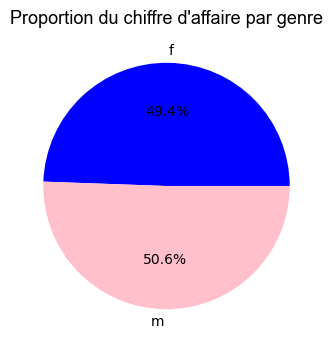

In [63]:
# J'affiche la proportion du CA par genre
plt.figure(figsize=(4, 4))
colors = ['blue', 'pink']
plt.pie(ca_genre['price'], labels=ca_genre['sex'], colors=colors, autopct='%1.1f%%')
plt.title("Proportion du chiffre d'affaire par genre", fontname='Arial', fontsize=13)
plt.show()

#### Les hommes génerent plus de CA que les femmes. La différence est compte a elle légère.  

In [64]:
# Chiffre d'affaire par catégorie et par genre
ca_categ_genre = df.groupby(['categ', 'sex']).sum()[['price']].reset_index()
ca_categ_genre

,categ,sex,price
0,0,f,2190013.07
1,0,m,2229717.90
2,1,f,2358417.02
3,1,m,2295305.67
4,2,f,1311253.04
5,2,m,1469021.98


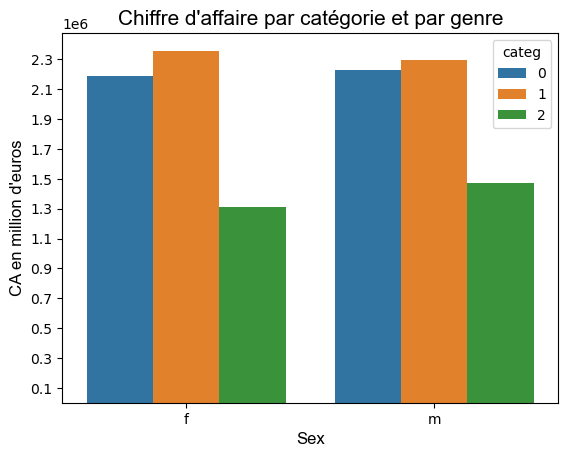

In [65]:
sns.barplot(data=ca_categ_genre, x='sex', y='price', ci=None, hue='categ', estimator=sum)
plt.title("Chiffre d'affaire par catégorie et par genre", fontname='Arial', fontsize=15)
plt.yticks(np.arange(100000, 2500000, 200000))
plt.xlabel("Sex", fontname='Arial', fontsize=12)
plt.ylabel("CA en million d'euros", fontname='Arial', fontsize=12)
plt.show()

#### Les hommes génerent plus de CA que les femmes dans les catégorie 0 et 2, et le femme devance les hommes dans la catégorie 1 uniqument.         La difference du CA par catégories entre homme et femme reste minime.

In [66]:
# Chiffre d'affaire par tranche d'âge et par genre
ca_tranche_genre = df.groupby(['age_rang', 'sex']).sum()[['price']].reset_index()
ca_tranche_genre

,age_rang,sex,price
0,"(18, 30]",f,1417734.39
1,"(18, 30]",m,1647063.79
2,"(30, 50]",f,2723134.68
3,"(30, 50]",m,2833452.50
4,"(50, 70]",f,1388462.60
5,"(50, 70]",m,1272864.15
6,"(70, 95]",f,330351.46
7,"(70, 95]",m,240665.11


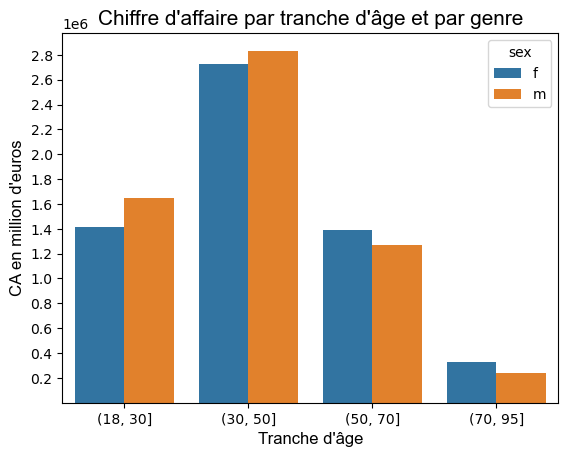

In [67]:
sns.barplot(data=ca_tranche_genre, x='age_rang', y='price', ci=None, hue='sex', estimator=sum)
plt.title("Chiffre d'affaire par tranche d'âge et par genre", fontname='Arial', fontsize=15)
plt.yticks(np.arange(200000, 3000000, 200000))
plt.xlabel("Tranche d'âge", fontname='Arial', fontsize=12)
plt.ylabel("CA en million d'euros", fontname='Arial', fontsize=12)
plt.show()

#### Les femmes devancent les hommes dans chez les 18-30 ans et 30-50. Et les hommes devancent les femmes chez les 50-70 ans et 70-95 ans. La tranche d'age 30-50 et celle qui genere le plus de CA et la tranche 70-95 celle qui en genere le moins. Cela pourrait être du au fait que cette tranche d'age compte moins de client que les autres tranches d'âge. De plus, je pense que plus la personne est agée moins elle a accès à internet ou ne sait passer commande en ligne mais aussi, plus la personne est agée moins elle lit. 

### 5.1.2 L'évolution dans le temps du chiffre d'affaire

In [68]:
# 1 Je calcule le chiffre d'affaire mensuel 
ca_mensuel = df.groupby(['month_year']).sum()[['price']].reset_index()
ca_mensuel.head()

,month_year,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40


In [69]:
ca_mensuel['price'].describe()

count        24.000000
mean     493905.361667
std       41208.740111
min      320798.740000
25%      483775.270000
50%      501566.105000
75%      515634.330000
max      535571.500000
Name: price, dtype: float64

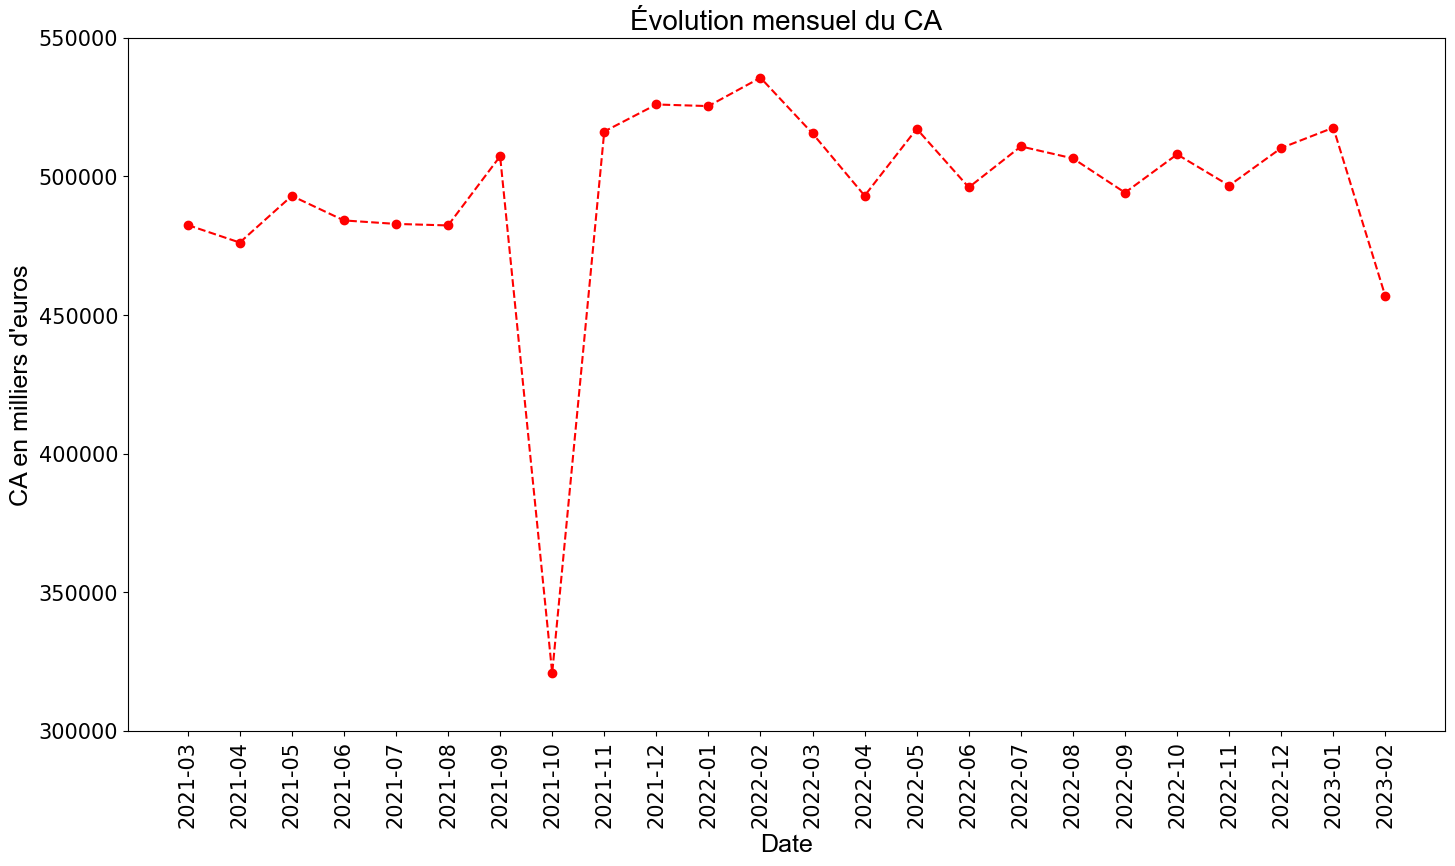

In [70]:
plt.figure(figsize=(17, 9))
ca_mensuel['month_year'] = ca_mensuel['month_year'].astype(str)
plt.plot(ca_mensuel['month_year'], ca_mensuel["price"], marker='o', linestyle='--', color='red')
plt.title("Évolution mensuel du CA", fontname='Arial', fontsize=20)
plt.xlabel("Date", fontname='Arial', fontsize=18)
plt.ylabel("CA en milliers d'euros", fontname='Arial', fontsize=18)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(np.arange(300000, 600000, 50000), fontsize=15)
plt.show()

In [71]:
octobre_2021 = df.loc[df['month_year'] == '2021-10']
octobre_2021

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ,month_year,age,age_rang
13,c_2809,m,1981,0_1316,2021-10-26,s_110587,2021,10,26,7.20,0,2021-10,42,"(30, 50]"
14,c_1987,f,1972,0_1316,2021-10-16,s_105529,2021,10,16,7.20,0,2021-10,51,"(50, 70]"
18,c_3770,m,1956,0_1316,2021-10-29,s_111884,2021,10,29,7.20,0,2021-10,67,"(50, 70]"
39,c_2993,m,1964,0_1316,2021-10-20,s_107468,2021,10,20,7.20,0,2021-10,59,"(50, 70]"
51,c_5835,f,1991,0_1316,2021-10-22,s_108696,2021,10,22,7.20,0,2021-10,32,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679234,c_6597,f,1974,0_1331,2021-10-08,s_101952,2021,10,8,29.99,0,2021-10,49,"(30, 50]"
679244,c_8374,m,1963,0_79,2021-10-18,s_106386,2021,10,18,24.99,0,2021-10,60,"(50, 70]"
679252,c_1892,f,1974,0_73,2021-10-02,s_98924,2021,10,2,2.99,0,2021-10,49,"(30, 50]"
679263,c_1716,f,1977,0_1459,2021-10-01,s_98400,2021,10,1,0.99,0,2021-10,46,"(30, 50]"


In [72]:
df.loc[df['month_year'] == '2021-10']['price'].sum()

320798.74

In [73]:
df.loc[df['month_year'] == '2021-10']['session_id'].count()

21599

In [74]:
df.loc[df['categ'] == 0]['session_id'].count()

415459

In [75]:
df.loc[df['categ'] == 1]['session_id'].count()

227169

In [76]:
df.loc[df['categ'] == 2]['session_id'].count()

36483

#### Le CA est au maximum en fervrier 2022, et est en net baisse en octobre 2021 (minimum) cela s'explique par le nombre de commande passées dans la categ 1 qui est la moins chere et le nombre bas de commande passée en categ 2 qui est la plus chere comme vu ci_dessus( boite à moustache). 

In [77]:
# Je calcule le chiffre d'affaires hebdomadaire
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.week
ca_week = df.groupby(['week'])['price'].sum().reset_index()
ca_week.head()

,week,price
0,1,235130.73
1,2,237955.59
2,3,230521.87
3,4,239631.52
4,5,242148.03


In [78]:
ca_week.describe()

,week,price
count,52.000000,52.000000
mean,26.500000,227956.320769
std,15.154757,15419.964565
min,1.000000,175396.020000
25%,13.750000,223364.672500
50%,26.500000,228744.070000
75%,39.250000,236132.265000
max,52.000000,267716.640000


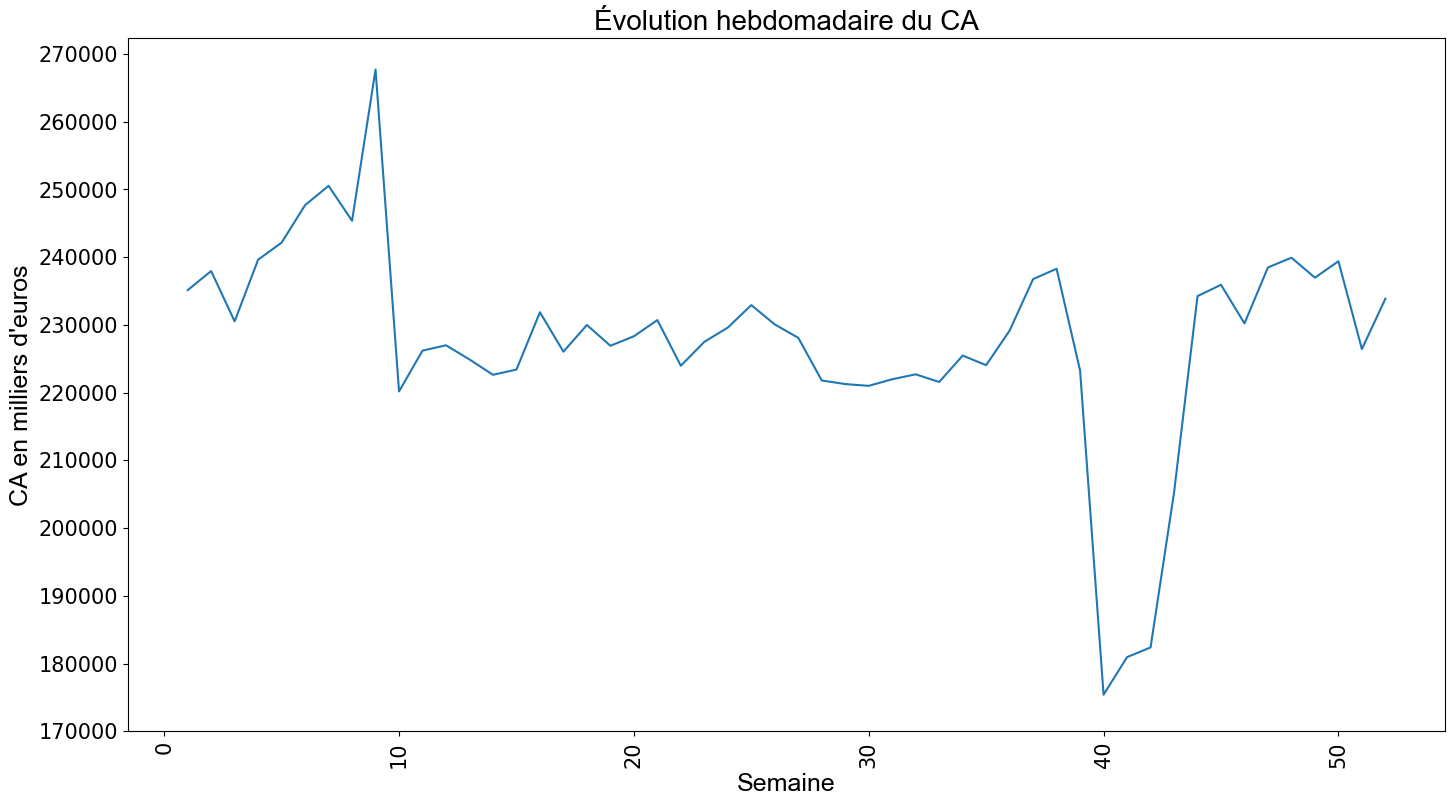

In [79]:
plt.figure(figsize=(17, 9))
plt.plot(ca_week['week'], ca_week["price"])
plt.title("Évolution hebdomadaire du CA", fontname='Arial', fontsize=20)
plt.xlabel("Semaine", fontname='Arial', fontsize=18)
plt.ylabel("CA en milliers d'euros", fontname='Arial', fontsize=18)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(np.arange(170000, 280000, 10000), fontsize=15)
plt.show()

#### Le CA est en net baisse au environ de la semaine 40, ce qui correspond au mois d'octobre 2010.

In [80]:
# Je calcule le CA par jour 
ca_day = df.groupby(['date']).sum()[['price']].reset_index()
ca_day.head()

,date,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


In [81]:
ca_day['price'].describe()

count      730.000000
mean     16237.984493
std       1847.906447
min       8076.040000
25%      15476.225000
50%      16223.305000
75%      17185.785000
max      20487.680000
Name: price, dtype: float64

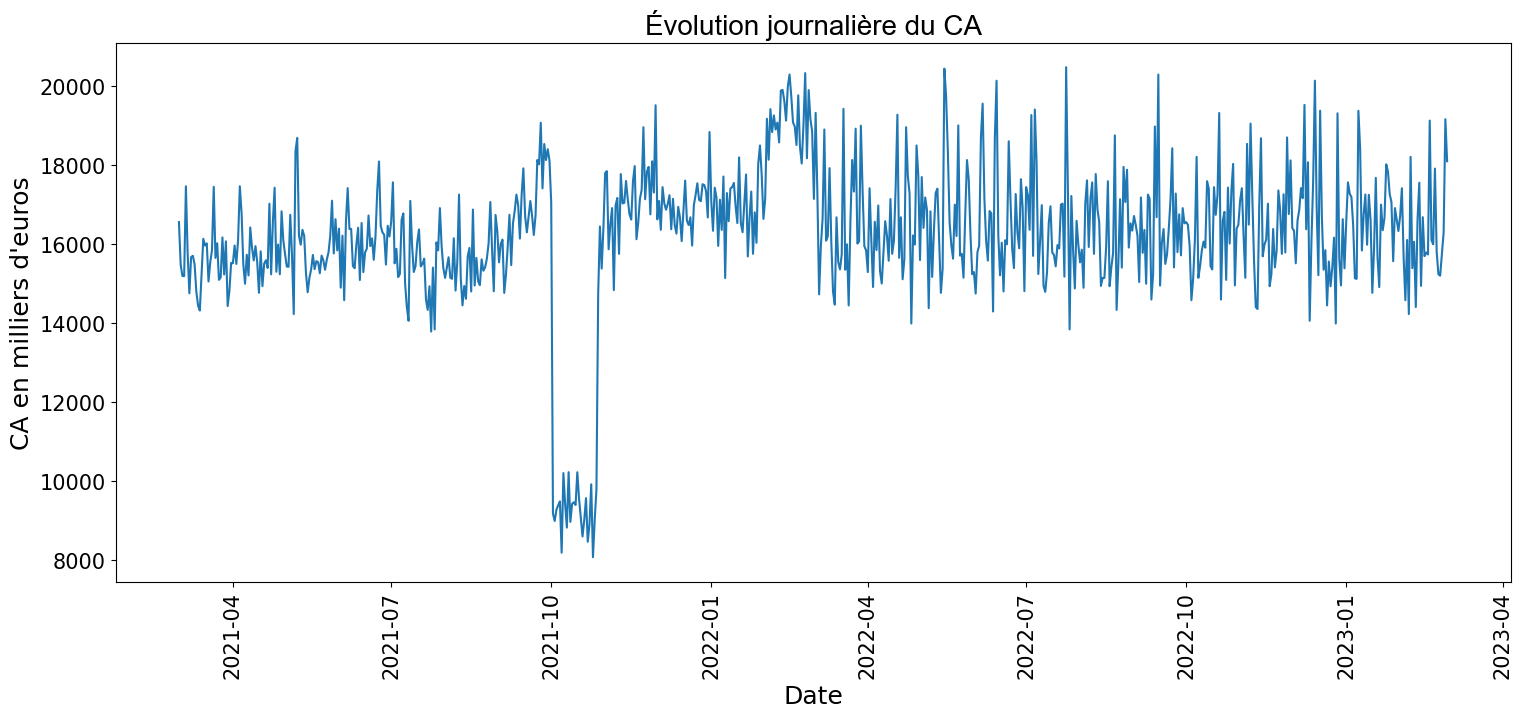

In [82]:
plt.figure(figsize=(18, 7))
plt.plot(ca_day['date'], ca_day["price"])
plt.title("Évolution journalière du CA", fontname='Arial', fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("CA en milliers d'euros",  fontsize=18)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(np.arange(8000, 21000, 2000), fontsize=15)
plt.show()

#### Le CA journalier suis la même tendance que le CA hebdomadaire et mensuel.

### 5.1.3 Moyenne mobile

In [83]:
# Je calcule la moyenne mobile par jour, semaine et mois
rolling_mean_day = df.groupby('date')['price'].sum().rolling(window=7, min_periods=1).mean()
rolling_mean_week = df.groupby(pd.Grouper(key='date', freq='W-MON'))['price'].sum().rolling(window=7, min_periods=1).mean()
rolling_mean_month = df.groupby(pd.Grouper(key='date', freq='M'))['price'].sum().rolling(window=30, min_periods=1).mean()

print(rolling_mean_day)
print(rolling_mean_week)
print(rolling_mean_month)

date
2021-03-01    16565.220000
2021-03-02    16025.835000
2021-03-03    15750.120000
2021-03-04    15611.607500
2021-03-05    15983.560000
                  ...     
2023-02-24    16488.778571
2023-02-25    16006.747143
2023-02-26    16035.021429
2023-02-27    16487.570000
2023-02-28    16513.984286
Name: price, Length: 730, dtype: float64
date
2021-03-01     16565.220000
2021-03-08     63071.405000
2021-03-15     77432.726667
2021-03-22     85968.162500
2021-03-29     90418.742000
                  ...      
2023-02-06    114375.810000
2023-02-13    115353.637143
2023-02-20    115223.540000
2023-02-27    114705.207143
2023-03-06    100937.495714
Freq: W-MON, Name: price, Length: 106, dtype: float64
date
2021-03-31    482440.610000
2021-04-30    479274.955000
2021-05-31    483831.126667
2021-06-30    483895.485000
2021-07-31    483683.468000
2021-08-31    483450.355000
2021-09-30    486848.972857
2021-10-31    466092.693750
2021-11-30    471656.586667
2021-12-31    477082.656000
2022-

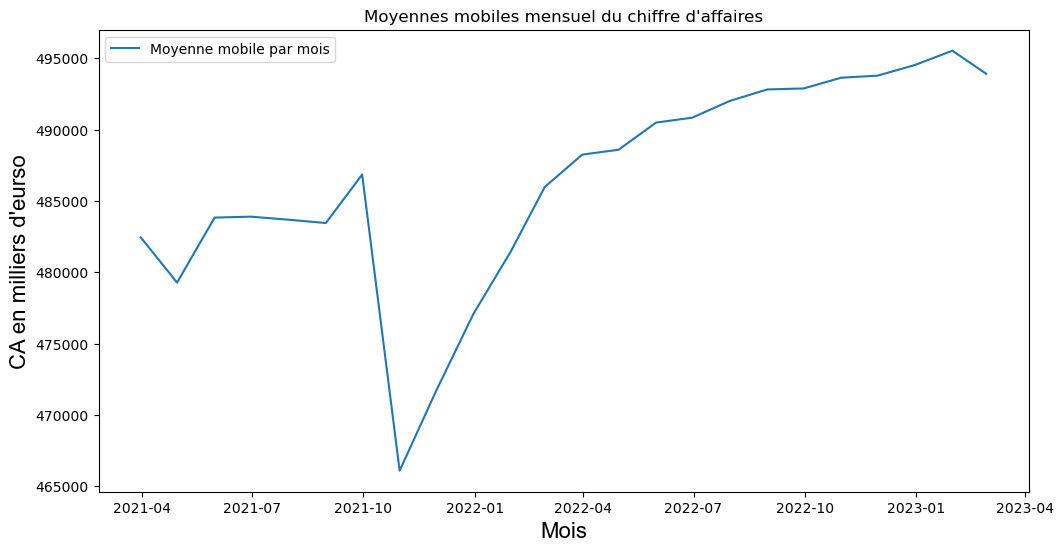

In [84]:
# J'affiche le résultat dans un graphique pour la moyenne mobile mensuel uniquement
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rolling_mean_month, label='Moyenne mobile par mois')
ax.set_title('Moyennes mobiles mensuel du chiffre d\'affaires')
plt.xlabel("Mois", fontname='Arial', fontsize=16)
plt.ylabel("CA en milliers d'eurso", fontname='Arial', fontsize=16)
ax.legend()
plt.show()

#### La moyenne mobile du CA mensuel suis la meme tendance que l'évolution du CA vu ci-dessus. En effet il y'a une forte baisse en 10/2021 et ensuite reaugmentation.

### Question 2: Zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc.
### 5.2.1 Les références : tops et flops

In [85]:
# Produits les plus vendus
top_produits = df.groupby('id_prod')['session_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print("Les produits les plus vendus :")
print(top_produits.head())

Les produits les plus vendus :
     id_prod  count
2591   1_369   2252
2644   1_417   2189
2641   1_414   2180
2733   1_498   2128
2653   1_425   2096


In [86]:
# Produits les moins vendus
flops_produits = df.groupby('id_prod')['session_id'].count().reset_index(name='count').sort_values(['count'], ascending=True)
print("Les produits les moins vendus :")
print(flops_produits.head())

Les produits les moins vendus :
     id_prod  count
1327  0_2201      1
665   0_1601      1
1792   0_549      1
3247    2_81      1
2079   0_807      1


### 5.2.2 La répartition par catégorie

In [87]:
# Produits les plus vendus par catégorie
top_produits_categ = df.groupby(['categ','id_prod'])['session_id'].count().reset_index(name='count').sort_values(['categ','count'], ascending=False).groupby('categ').head()
print("Les produits les plus vendus par catégorie :")
print(top_produits_categ)

Les produits les plus vendus par catégorie :
      categ id_prod  count
3034      2   2_102   1027
3070      2   2_135   1005
3045      2   2_112    968
3201      2    2_39    915
3199      2    2_37    882
2591      1   1_369   2252
2644      1   1_417   2189
2641      1   1_414   2180
2733      1   1_498   2128
2653      1   1_425   2096
466       0  0_1422   1292
476       0  0_1431   1282
469       0  0_1425   1266
477       0  0_1432   1254
454       0  0_1411   1246


In [88]:
# Produits les moins vendus par catégorie
flops_produits_categ = df.groupby(['categ','id_prod'])['session_id'].count().reset_index(name='count').sort_values(['categ','count'], ascending=True).groupby('categ').head()
print("Les produits les moins vendus par catégorie :")
print(flops_produits_categ)

Les produits les moins vendus par catégorie :
      categ id_prod  count
166       0  0_1151      1
313       0  0_1284      1
417       0  0_1379      1
549       0  0_1498      1
595       0  0_1539      1
2628      1   1_402      2
2648      1   1_420      2
2752      1   1_514      2
2344      1   1_146      3
2630      1   1_404      3
3175      2    2_23      1
3247      2    2_81      1
3263      2    2_98      1
3242      2    2_77      2
3258      2    2_93      2


### Question 3: Quelques informations sur les profils des clients, et également la répartition du chiffre d'affaires entre eux, via la courbe de Lorenz.

### 5.3.1 Informations sur les profils clients


In [89]:
df.head()

,client_id,sex,birth,id_prod,date,session_id,year,month,day,price,categ,month_year,age,age_rang,week
0,c_4410,f,1967,0_1316,2021-12-29,s_141762,2021,12,29,7.2,0,2021-12,56,"(50, 70]",52
1,c_4410,f,1967,0_1316,2022-03-29,s_186233,2022,3,29,7.2,0,2022-03,56,"(50, 70]",13
2,c_4410,f,1967,0_1316,2022-05-29,s_215758,2022,5,29,7.2,0,2022-05,56,"(50, 70]",21
3,c_3654,f,1978,0_1316,2021-11-26,s_125143,2021,11,26,7.2,0,2021-11,45,"(30, 50]",47
4,c_3654,f,1978,0_1316,2022-08-26,s_258546,2022,8,26,7.2,0,2022-08,45,"(30, 50]",34


In [90]:
# Clients qui dépesent le plus
top_clients = df.groupby('client_id').agg({'session_id': 'count', 'price': 'sum'})
# Je renomme les colonnes pour plus de clarté
top_clients = top_clients.rename(columns={'session_id': 'nombre_achats', 'price': 'montant_total'})
top_clients = top_clients.sort_values('montant_total', ascending=False)
top_clients.head(10)

,nombre_achats,montant_total
client_id,,
c_1609,25488,324033.35
c_4958,5195,289760.34
c_6714,9181,153598.92
c_3454,6770,113637.93
c_3263,403,5276.87
c_1570,369,5271.62
c_2899,105,5214.05
c_2140,402,5208.82
c_7319,371,5155.77


In [91]:
top_clients.describe()

,nombre_achats,montant_total
count,8600.000000,8600.000000
mean,78.966395,1378.340544
std,312.402910,5182.542488
min,1.000000,6.310000
25%,27.000000,547.630000
50%,51.000000,1027.020000
75%,96.000000,1779.500000
max,25488.000000,324033.350000


#### Nous avons 4 gros clients dont le montant des achats et le nombre de commande sont très élevés comparés aux autres. Il s'agit visiblement au vu du montant total d'achat, de client professionnel ( Entreprise, centre culturel etc.)

In [92]:
# Clients qui dépesent le moins
flops_clients = df.groupby('client_id').agg({'session_id': 'count', 'price': 'sum'})
# Je renomme les colonnes pour plus de clarté
flops_clients = flops_clients.rename(columns={'session_id': 'nombre_achats', 'price': 'montant_total'})
flops_clients = flops_clients.sort_values('montant_total', ascending=True)
flops_clients.head(10)

,nombre_achats,montant_total
client_id,,
c_8351,1,6.31
c_8140,2,8.30
c_8114,2,9.98
c_240,1,11.06
c_4648,1,11.20
c_4478,1,13.36
c_5962,1,13.99
c_6040,2,15.72
c_5919,2,15.98


In [93]:
# Clients qui dépesent le plus par tranche d'âge et par genre
tops_clients_age_genre = df.groupby(['age_rang', 'sex']).agg({'session_id': 'count', 'price': 'sum'})
# Je renomme les colonnes pour plus de clarté
tops_clients_age_genre = tops_clients_age_genre.rename(columns={'session_id': 'nombre_achats', 'price': 'montant_total'})
tops_clients_age_genre = tops_clients_age_genre.sort_values('montant_total', ascending=False)
tops_clients_age_genre

nombre_achats  montant_total
age_rang sex                              
(30, 50] m           210019     2833452.50
         f           199027     2723134.68
(18, 30] m            38837     1647063.79
         f            35198     1417734.39
(50, 70] f            84344     1388462.60
         m            77486     1272864.15
(70, 95] f            19716      330351.46
         m            14484      240665.11

#### Les hommes chez les 30-50 sont ceux qui depensent le plus.

In [94]:
# Clients qui dépesent le moins par tranche d'âge et par genre
flops_clients_age_genre = df.groupby(['age_rang', 'sex']).agg({'session_id': 'count', 'price': 'sum'})
# Je renomme les colonnes pour plus de clarté
flops_clients_age_genre = flops_clients_age_genre.rename(columns={'session_id': 'nombre_achats', 'price': 'montant_total'})
flops_clients_age_genre = flops_clients_age_genre.sort_values('montant_total', ascending=True)
flops_clients_age_genre

nombre_achats  montant_total
age_rang sex                              
(70, 95] m            14484      240665.11
         f            19716      330351.46
(50, 70] m            77486     1272864.15
         f            84344     1388462.60
(18, 30] f            35198     1417734.39
         m            38837     1647063.79
(30, 50] f           199027     2723134.68
         m           210019     2833452.50

#### Les hommes chez les 70-95 sont ceux qui depensent le moins.

### 5.3.2 Répartition du chiffre d'affaire entre les clients : Courbe de Lorenz

In [95]:
# Je calcule le CA par client 
ca_client = df.groupby('client_id')['price'].sum()
df_ca_client = ca_client.reset_index(name='price')
df_ca_client.head()

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


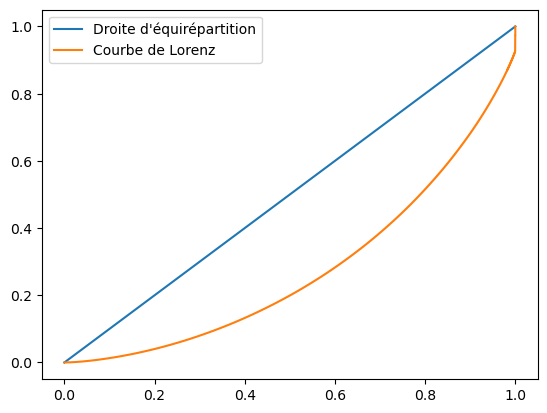

In [96]:
# J'affiche le résultat via la Courbe de lorenz
globale = df_ca_client['price']
lorenz = np.cumsum(np.sort(globale)) / globale.sum()
lorenz = np.append([0], lorenz) # La courbe de Lorenz commence à 0    
y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,y, label ="Droite d'équirépartition")
plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle='steps-post', label = 'Courbe de Lorenz')
plt.legend()
plt.show()

#### La zone entre la première bissectrice et la courbe de Lorenz représente l'inégalité dans la distribution.
#### Ainsi, plus la courbe de Lorenz s'éloigne de la droite d'équirépartition, plus l'inégalité est grande. Ci-dessus, la courbe de Lorenz est loin de la droite d'équirépartition, ce qui represente une distribution non équitable du CA entre les clients. Nous pouvons interpreter la courbe de la manière suivante :  50% du CA est generé par 80% des clients.

### Indice de Gini 

In [97]:
# Je calcule la surface sous la courbe de Lorenz.
n = len(lorenz) - 1
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 

# Je calcule la surface entre la première bissectrice et le courbe de Lorenz
S = 0.5 - AUC 
gini = 2*S
print(round(gini,2))

0.45


#### Le coefficient de Gini est de 0,45, il indique une certaine inégalité dans la distribution du CA entre les clients. Cela signifie que certains clients generent un CA relativement élevé, tandis que d'autres generent un CA relativement bas. En outre, Cela signifie que la concentration du chiffre d'affaire n'est pas uniforme entre les clients et qu'il y a une forte variation dans les revenus générés par chaque client. Cela est probablement du à la difference des dépenses vue précedement, entre clients profesionnels et clients lamdas.

## 6. QUESTIONS de Julie

### Question 1: Le lien entre le genre d’un client et les catégories des livres achetés; et ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

### 6.1.1 Le lien entre le genre d’un client et les catégories des livres achetés

In [98]:
# Analyse de 2 variables qualitatives 
genre_categ = df.groupby(['sex','categ']).count()[['session_id']]
genre_categ

session_id
sex categ            
f   0          206103
    1          114899
    2           17283
m   0          209356
    1          112270
    2           19200

In [99]:
# Je crée le tableau de contingence avec les totaux
tab = pd.crosstab(df['sex'], df['categ'], margins=True, margins_name='Total') # Pour ajouter les totaux
tab

categ,0,1,2,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


In [100]:
# J'éffectue le test du chi²
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(tab)
print('La valeur de test du chi²:', stat)
print('La p-value:', p)
print('Degrés de liberté:', dof)
print('Tableau de fréquences attendues:', expected)

La valeur de test du chi²: 147.11906816131497
La p-value: 3.144522803251581e-29
Degrés de liberté: 6
Tableau de fréquences attendues: [[206952.24759281 113159.50583189  18173.2465753  338285.        ]
 [208506.75240719 114009.49416811  18309.7534247  340826.        ]
 [415459.         227169.          36483.         679111.        ]]


#### La p-value est très faible dans notre cas (inférieure au seuil de significativité de 0.05). Je rejette donc l'hypothèse nulle d'indépendance entre ces deux variables et je conclue qu'il existe une relation entre le genre d'un client et la catégorie de livre acheté. 

### 6.1.2 Le lien entre l’âge des clients et le montant total des achats

In [101]:
# Analyse 2 variables quantitatives 
age_achat =  df.groupby(['age', 'client_id'])['price'].sum()
df_age_achat = age_achat.reset_index(name='montant_total_achat')
df_age_achat

,age,client_id,montant_total_achat
0,19,c_1042,348.75
1,19,c_1046,919.58
2,19,c_1065,1124.66
3,19,c_1088,590.47
4,19,c_109,415.19
...,...,...,...
8595,93,c_4679,43.96
8596,93,c_7232,2927.99
8597,94,c_5302,549.02
8598,94,c_577,1829.96


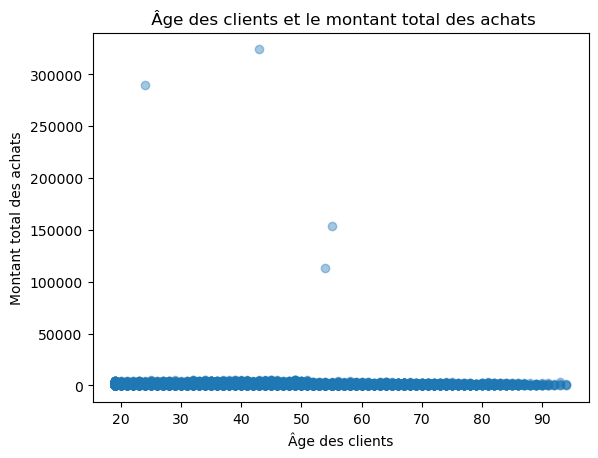

In [102]:
# Je crée le graphique diagramme de dispersion en utilisant les variables "age" et "price"
plt.scatter(df_age_achat['age'], df_age_achat['montant_total_achat'], alpha=0.4)
plt.title(" Âge des clients et le montant total des achats")
plt.xlabel('Âge des clients')
plt.ylabel('Montant total des achats')
plt.show()

#### Le graphique nous indique que les plus grands montant d'achat sont génerés par les moins de 60 ans.

In [103]:
# Je vérifie si la variable 'age' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov 
st.kstest(df_age_achat.age,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [104]:
# Je vérifie si la variable 'montant' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov
st.kstest(df_age_achat.montant_total_achat, 'norm')

KstestResult(statistic=0.9999999998604823, pvalue=0.0)

#### Dans les deux cas, la p-value est <  0.05 ( seuil de signification par défaut), je rejette donc l'hypothèse nulle, car p-value ici = 0.0. Les deux variables ne suivent pas une loi normale. Par conséquent, je ne peux utiliser le test de pearson (paramétrique) j'opte donc pour le test de spearman (non paramétrique).

In [105]:
# Test de correlation de spearman 
corr, p = st.spearmanr(df_age_achat['age'], df_age_achat['montant_total_achat'])
print("Coefficient de corrélation de Spearman :", corr)
print("P-value :", p)

Coefficient de corrélation de Spearman : -0.18497958594419583
P-value : 4.5976948366705104e-67


####  H0: Les deux variables ne sont pas linéairement corrélées.

#### Le p-value est 4.5976948366705104e-67, ce qui est très faible, elle est inférieure à la valeur seuil de 0,05. Je rejette donc l'hypothèse nulle,  les deux variables 'age' et 'montant_total_achat' sont corrélées.

#### Le coéfficient de corrélation de Spearman =-0.18 indique une corrélation négative entre l'âge et le montant total d'achat. Cela signifie que plus l'âge est élevé, moins le montant total d'achat est élevé et vice versa. 

### 6.1.3 Le lien entre l’âge des clients et la fréquence d’achat 

In [106]:
# Ananlyse 2 variables quantitatives 
#Je calcule la fréquence d'achat de chaque client et je l'affiche dans une variable
frequence_achat = df.groupby(['client_id', 'age']).count()['date']
df_freq_achat = frequence_achat.reset_index(name='frequence')
df_freq_achat

,client_id,age,frequence
0,c_1,68,39
1,c_10,67,58
2,c_100,31,8
3,c_1000,57,125
4,c_1001,41,102
...,...,...,...
8595,c_995,68,14
8596,c_996,53,95
8597,c_997,29,59
8598,c_998,22,53


In [107]:
df_freq_achat['frequence'].describe()

count     8600.000000
mean        78.966395
std        312.402910
min          1.000000
25%         27.000000
50%         51.000000
75%         96.000000
max      25488.000000
Name: frequence, dtype: float64

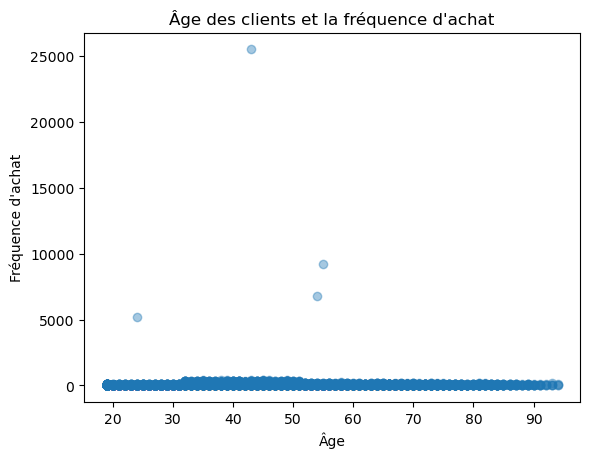

In [108]:
# J'affiche le résultat dans un graphique de disperssion
plt.scatter(df_freq_achat['age'], df_freq_achat['frequence'], alpha=0.4)
plt.xlabel("Âge")
plt.ylabel("Fréquence d'achat")
plt.title("Âge des clients et la fréquence d'achat")
plt.show()

#### Le graphique nous indique que les fréquences d'achat les plus élevées sont chez les moins de 60 ans.

In [109]:
# Je vérifie si la variable 'age' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov 
st.kstest(df_freq_achat.age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [110]:
# Je vérifie si la variable 'fréquence' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov 
st.kstest(df_freq_achat.frequence, 'norm')

KstestResult(statistic=0.9928361484799978, pvalue=0.0)

#### Dans les deux cas, la p-value est <  0.05 ( seuil de signification par défaut), je rejette donc l'hypothèse nulle, car p-value ici = 0.0. Les deux variables ne suivent pas une loi normale. Par conséquent, je ne peux utiliser le test de pearson (paramétrique) j'opte donc pour le test de spearman (non paramétrique).

In [111]:
# Test de correlation de spearman 
corr, p = st.spearmanr(df_freq_achat['age'], df_freq_achat['frequence'])
print("Coefficient de corrélation de Spearman :", corr)
print("P-value :", p)

Coefficient de corrélation de Spearman : 0.1281196863733412
P-value : 8.377986603451065e-33


####  H0: Les deux variables ne sont pas linéairement corrélées.

#### Le p-value est 8.377986603451065e-33, ce qui est très faible, elle est inférieure à la valeur seuil de 0,05. Je rejette donc l'hypothèse nulle,  les deux variables 'age' et 'frequence' sont corrélées.

#### Le coéfficient de corrélation de Spearman =-0,13 indique une corrélation négative entre l'âge et la fréquence d'achat. Cela signifie que plus l'âge est élevé, moins la fréquence d'achat est élevée et vice versa. 

### 6.1.4 Le lien entre l’âge des clients et la taille du panier moyen 

In [112]:
# Analyse 2 variables quantitatives
# Je calcule la taille du panier moyen par âge et par client
panier_moyen = df.groupby(['age','client_id']).mean()['price']
df_panier_moyen = panier_moyen.reset_index(name='panier_moyen')
df_panier_moyen

,age,client_id,panier_moyen
0,19,c_1042,29.062500
1,19,c_1046,22.428780
2,19,c_1065,41.654074
3,19,c_1088,45.420769
4,19,c_109,59.312857
...,...,...,...
8595,93,c_4679,10.990000
8596,93,c_7232,17.853598
8597,94,c_5302,14.838378
8598,94,c_577,15.912696


In [113]:
df_panier_moyen['panier_moyen'].describe()

count    8600.000000
mean       22.024390
std        15.006754
min         4.150000
25%        13.360135
50%        15.794981
75%        22.043137
max       181.990000
Name: panier_moyen, dtype: float64

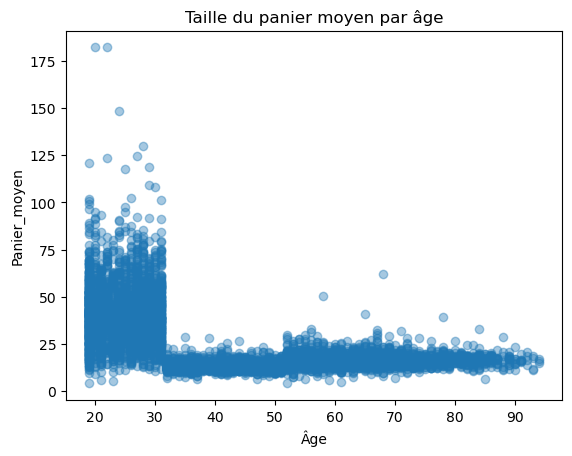

In [114]:
# J'affiche le résultat dans un graphique de disspression 
plt.scatter(df_panier_moyen['age'], df_panier_moyen['panier_moyen'], alpha=0.4)
plt.title("Taille du panier moyen par âge")
plt.xlabel('Âge')
plt.ylabel('Panier_moyen')
plt.show()

In [115]:
# Je vérifie si la variable 'age' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov 
st.kstest(df_panier_moyen.age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [116]:
# Je vérifie si la variable 'panier_moyen' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov 
st.kstest(df_panier_moyen.panier_moyen, 'norm')

KstestResult(statistic=0.9999833762362703, pvalue=0.0)

#### Dans les deux cas, la p-value est <  0.05 ( seuil de signification par défaut), je rejette donc l'hypothèse nulle, car p-value ici = 0.0. Les deux variables ne suivent pas une loi normale. Par conséquent, je ne peux utiliser le test de pearson (paramétrique) j'opte donc pour le test de spearman (non paramétrique).

In [117]:
# Test de correlation de spearman 
corr, p = st.spearmanr(df_panier_moyen['age'], df_panier_moyen['panier_moyen'])
print("Coefficient de corrélation de Spearman :", corr)
print("P-value :", p)

Coefficient de corrélation de Spearman : -0.32613572482392383
P-value : 2.8807091229415435e-212


####  H0: Les deux variables ne sont pas linéairement corrélées.

#### La P-value est de 2.8807091229415435e-212, ce qui est très faible, elle est inférieure à la valeur seuil de 0.05. Je rejette donc l'hypothèse nulle,  les deux variables 'age' et 'panier_moyen' sont corrélées.

#### Le coéfficient de corrélation de Spearman est de -0.32. Cela indique une corrélation négative entre l'âge et le panier moyen. Cela signifie que, en général, lorsque l'une des variables augmente, l'autre tend à diminuer légèrement. Autrement dit, plus l'âge est élevé, moins le panier moyen est élevé et vice versa. 

### 6.1.5 Le lien entre l’âge des clients et les catégories des livres achetés

In [118]:
# Analyse d'une variable quantitative et une variable qualitative 
lien_age_categ = df.loc[:, ['age', 'categ']]
lien_age_categ.head()

,age,categ
0,56,0
1,56,0
2,56,0
3,45,0
4,45,0


In [119]:
# Je convertis la variable 'categ' en string pour mon graphique
lien_age_categ['categ'] = lien_age_categ['categ'].astype(str)

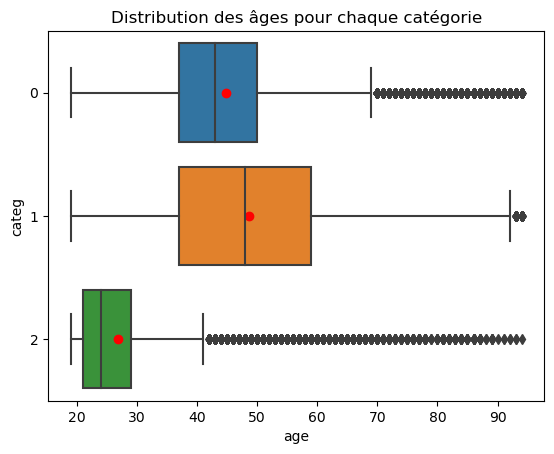

In [120]:
# Je trace une boîte à moustaches pour visualiser la distribution des âges pour chaque catégorie
sns.boxplot(x='age', y='categ', data=lien_age_categ )
# Je calcule les moyennes pour chaque groupe de categ
means = lien_age_categ.groupby('categ')['age'].mean()
plt.plot(means, [0, 1, 2], 'ro')
plt.title('Distribution des âges pour chaque catégorie')
plt.show()

#### Les points rouges au milieu de chaque boîte à moustache représentent la moyenne des âges. On observe ici qu'elle est très différents d'une catégorie à l'autre. On voit également que les categories 2 et 1 comptent le plus de valeurs aberrantes. 

In [121]:
# Je vérifie si la variable 'age' est normalement distribuée (suivent la loi normale) avec le test de kolmogorov-smirnov 
st.kstest(lien_age_categ.age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

#### Je rejette l'hypothèse nulle, car la p-value  = 0.0  La variable âge ne suis pas la normalité.


In [122]:
# Je Vérifie également l'égalité des variances dans chaque catégorie avec le test de levene 
from scipy.stats import levene
# Je crée les trois échantillons en fonction des trois modalités de la variable 'categ'
a = lien_age_categ[lien_age_categ['categ'] == 0]['age']
b = lien_age_categ[lien_age_categ['categ'] == 1]['age']
c = lien_age_categ[lien_age_categ['categ'] == 2]['age']

stat, p_value = levene(a, b, c)
print("Test de Levene : Statistique=%.3f, p=%.3f" % (stat, p_value))

if p_value > 0.05:
    print('Les variances sont homogènes')
else:
    print('Les variances ne sont pas homogènes')

Test de Levene : Statistique=26085.920, p=0.000
Les variances ne sont pas homogènes


#### Le test de Levene suggère que les variances ne sont pas égales entre les échantillons a, b et c car car la p-value  = 0.0 qui est donc < 0.05. Cela signifie que si j'utilise l'analyse de variance (ANOVA) qui est une méthode de test qui suppose l'égalité des variances, mes résultats peuvent être biaisés. Je vais donc opter pour le  test de Kruskal-Wallis comme alternative au test ANOVA car les données ne suivent pas une distribution normale  et les variances ne sont pas égales entre les categories.

In [123]:
# J'éffectue le test de kruskall-wallis (non paramétrique) 
from scipy.stats import kruskal
stat, p_value = kruskal(a, b, c)
print("Test de Kruskal-Wallis : Statistique=%.3f, p=%.3f" % (stat, p_value))

Test de Kruskal-Wallis : Statistique=79346.099, p=0.000


#### La p-value est égale à 0.0, ce qui est inférieur à 0.05. Je rejete donc l'hypothèse nulle et je conclure qu'au moins un groupe diffère significativement des autres en moyenne. En d'autres termes, il existe une différence significative entre les catégories de livres achetés en fonction de l'âge des clients. Les deux variables sont corrélées.